In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error


In [ ]:
#Loading the dataset from my computer
df = pd.read_csv('computer_lab_resources.csv')

In [5]:
#checking the dataframes
df.info


<bound method DataFrame.info of       lab_ID         lab_type  lab_capacity  user_ID   course_of_study  \
0          1  General Purpose            50     1001  Computer Science   
1          1  General Purpose            50     1001  Computer Science   
2          1  General Purpose            50     1001  Computer Science   
3          1  General Purpose            50     1001  Computer Science   
4          1  General Purpose            50     1001  Computer Science   
...      ...              ...           ...      ...               ...   
1345       1  General Purpose            50     1001  Computer Science   
1346       1  General Purpose            50     1001  Computer Science   
1347       1  General Purpose            50     1001  Computer Science   
1348       1  General Purpose            50     1001  Computer Science   
1349       1  General Purpose            50     1001  Computer Science   

      occupancy  time_stamp  computer_ID   CPU_usage  memory_usage  disk_usage 

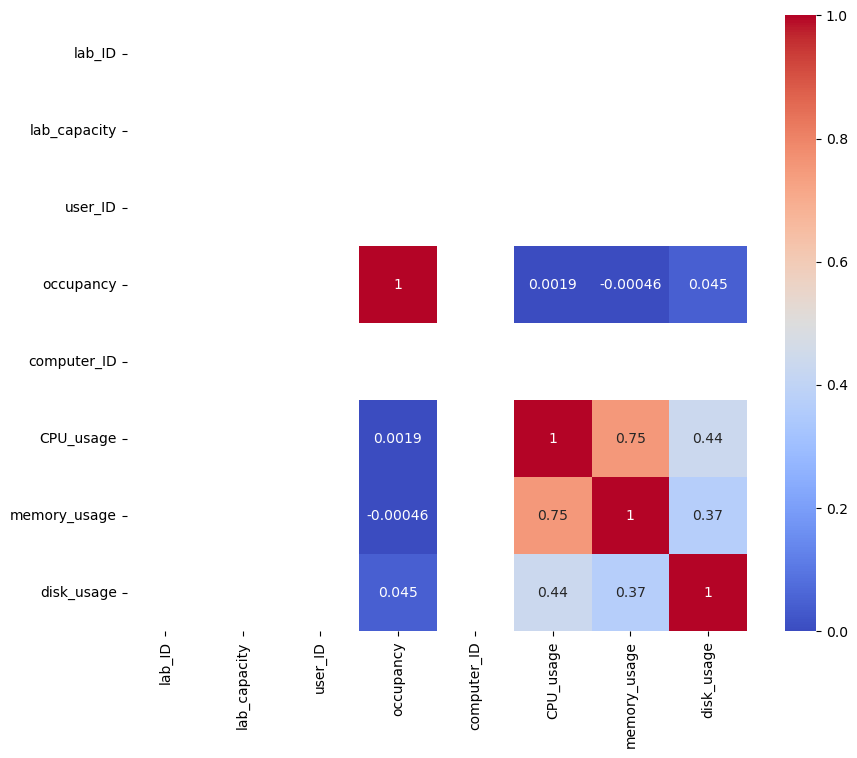

In [6]:
#To find the correlation between the numeric data, you can use a heatmap in Seaborn
# Select only the numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [7]:
# To drop any rows with missing values
df.dropna(inplace=True)

In [8]:
print(df.columns)

Index(['lab_ID', 'lab_type', 'lab_capacity', 'user_ID', 'course_of_study',
       'occupancy', 'time_stamp', 'computer_ID', 'CPU_usage', 'memory_usage',
       'disk_usage'],
      dtype='object')


In [13]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
# Preprocess the dataset
X = df.drop(['lab_ID', 'user_ID', 'time_stamp', 'occupancy'], axis=1)
y = df['occupancy']

In [15]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(['lab_type', 'course_of_study'], axis=1))
X_test_scaled = scaler.transform(X_test.drop(['lab_type', 'course_of_study'], axis=1))

In [17]:
# One-hot encode the categorical features
encoder = OneHotEncoder(sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[['lab_type', 'course_of_study']])
X_test_encoded = encoder.transform(X_test[['lab_type', 'course_of_study']])

# Combine the scaled and encoded features
X_train_combined = np.hstack((X_train_scaled, X_train_encoded))
X_test_combined = np.hstack((X_test_scaled, X_test_encoded))

In [18]:
#TRAINING THE MODEL

Mean squared error: 0.2509032679512215
Root mean squared error: 0.5009024535288498


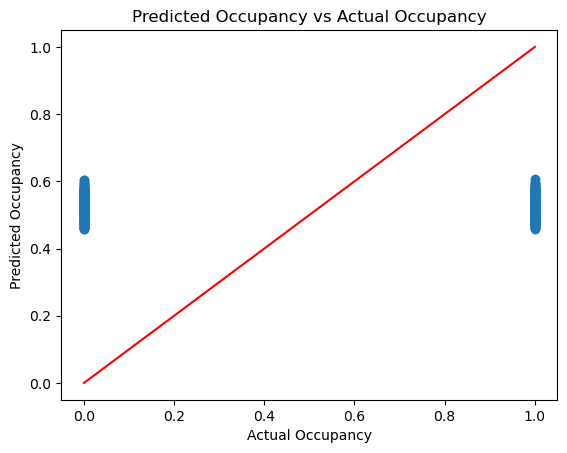

In [21]:
# Train a Linear Regression model
# Train the Linear Regression model
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_combined, y_train)

# Predict the occupancy for the test set
y_pred = model.predict(X_test_combined)

# Calculate the mean squared error and root mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean squared error:", mse)
print("Root mean squared error:", rmse)

# Create a scatter plot of the predicted occupancy values versus the actual occupancy values
plt.scatter(y_test, y_pred)

# Draw a line of best fit
plt.plot(y_test, y_test, color='red')

# Set the plot's title and labels
plt.title('Predicted Occupancy vs Actual Occupancy')
plt.xlabel('Actual Occupancy')
plt.ylabel('Predicted Occupancy')

# Show the plot
plt.show()

In [22]:
import pandas as pd

df['time_stamp'] = pd.to_datetime(df['time_stamp'])
df['time_stamp'] = df['time_stamp'].map(lambda x: x.timestamp()) / 1e9

In [23]:
# EVALUATING THE MODEL


In [24]:
#Optimize the model:
#Once we have a baseline model, we can try different machine learning algorithms, tune hyperparameters, and perform feature engineering to improve the model's performance.


Root Mean Squared Error: 0.5521801866962284
Mean Absolute Error: 0.5153846153846153
R-Squared: -0.2268714285714286


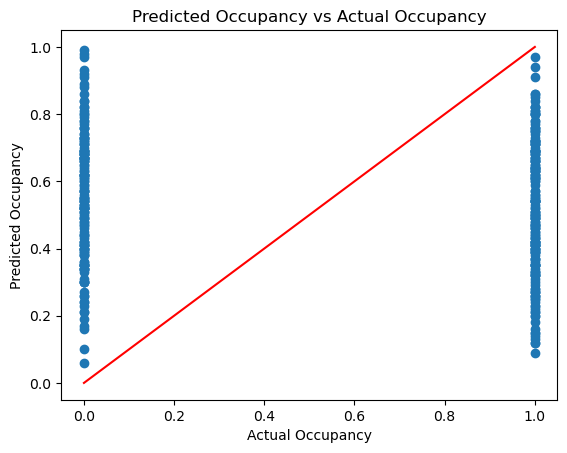

In [25]:
# TRAINING THE MODEL USING RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Train a Random Forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict the occupancy for the test set
y_pred = model.predict(X_test_scaled)

# Calculate the mean squared error and root mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate the R-squared
r2 = r2_score(y_test, y_pred)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Print the performance metrics
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R-Squared:', r2)

# Create a scatter plot of the predicted occupancy values versus the actual occupancy values
plt.scatter(y_test, y_pred)

# Draw a line of best fit
plt.plot(y_test, y_test, color='red')

# Set the plot's title and labels
plt.title('Predicted Occupancy vs Actual Occupancy')
plt.xlabel('Actual Occupancy')
plt.ylabel('Predicted Occupancy')

# Show the plot
plt.show()

Root Mean Squared Error: 0.6155347465544938
Mean Absolute Error: 0.46928352594048955
R-Squared: -0.524553121249713


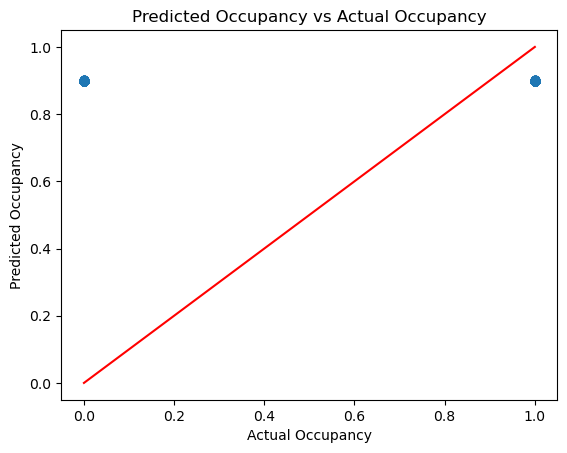

In [26]:
#TRAINING THE MODEL USING SVR
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



# Train an SVM regression model
model = SVR(kernel='linear', C=1)
model.fit(X_train_scaled, y_train)

# Predict the occupancy for the test set
y_pred = model.predict(X_test_scaled)

# Calculate the mean squared error and root mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate the R-squared
r2 = r2_score(y_test, y_pred)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Print the performance metrics
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R-Squared:', r2)

# Create a scatter plot of the predicted occupancy values versus the actual occupancy values
plt.scatter(y_test, y_pred)

# Draw a line of best fit
plt.plot(y_test, y_test, color='red')

# Set the plot's title and labels
plt.title('Predicted Occupancy vs Actual Occupancy')
plt.xlabel('Actual Occupancy')
plt.ylabel('Predicted Occupancy')

# Show the plot
plt.show()

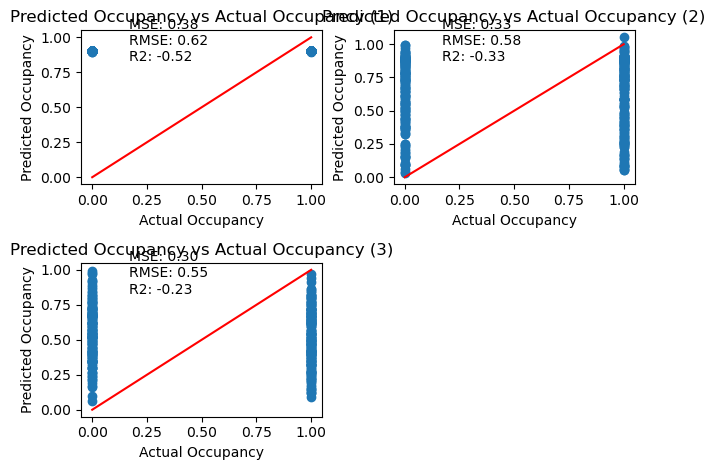

In [27]:
# comparing the training algorithms
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Train the algorithms and make predictions
models = [SVR(kernel='linear', C=1), SVR(kernel='rbf', C=1), RandomForestRegressor(n_estimators=100, random_state=42)]
predictions = []
for model in models:
    model.fit(X_train_scaled, y_train)
    predictions.append(model.predict(X_test_scaled))
    
    metrics = [mean_squared_error(y_test, pred) for pred in predictions]
rmse_values = [np.sqrt(mse) for mse in metrics]
r2_values = [r2_score(y_test, pred) for pred in predictions]

for i, (pred, rmse, r2) in enumerate(zip(predictions, rmse_values, r2_values)):
    plt.subplot(2, 2, i+1)
    plt.scatter(y_test, pred)
    plt.plot(y_test, y_test, color='red')
    plt.title(f'Predicted Occupancy vs Actual Occupancy ({i+1})')
    plt.xlabel('Actual Occupancy')
    plt.ylabel('Predicted Occupancy')
    plt.text(0.2, 0.8, f'MSE: {metrics[i]:.2f}\nRMSE: {rmse:.2f}\nR2: {r2:.2f}', transform=plt.gca().transAxes)

    
    
plt.tight_layout()
plt.show()




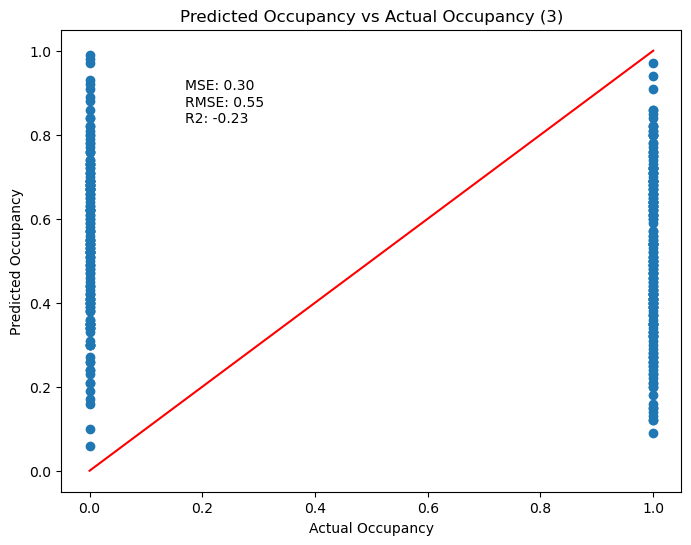

In [28]:
import seaborn as sns

# Find the index of the best algorithm based on R-squared
best_model_index = np.argmax(r2_values)

# Visualize the predictions of the best algorithm
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions[best_model_index])
plt.plot(y_test, y_test, color='red')
plt.title(f'Predicted Occupancy vs Actual Occupancy ({best_model_index+1})')
plt.xlabel('Actual Occupancy')
plt.ylabel('Predicted Occupancy')
plt.text(0.2, 0.8, f'MSE: {metrics[best_model_index]:.2f}\nRMSE: {rmse_values[best_model_index]:.2f}\nR2: {r2_values[best_model_index]:.2f}', transform=plt.gca().transAxes)

plt.show()

In [29]:
# COMPARING ALL THE MODELS

In [30]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Train the Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train_combined, y_train)

# Evaluate the Linear Regression model
y_pred_lr = model_lr.predict(X_test_combined)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression:")
print("Mean Squared Error:", mse_lr)
print("Root Mean Squared Error:", rmse_lr)
print("R-squared:", r2_lr)

# Train the SVR model
model_svr = SVR(kernel='linear', C=1, epsilon=0.2)
model_svr.fit(X_train_combined, y_train)

# Evaluate the SVR model
y_pred_svr = model_svr.predict(X_test_combined)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("SVR:")
print("Mean Squared Error:", mse_svr)
print("Root Mean Squared Error:", rmse_svr)
print("R-squared:", r2_svr)

# Train the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model_rf.fit(X_train_combined, y_train)

# Evaluate the Random Forest model
y_pred_rf = model_rf.predict(X_test_combined)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest:")
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)
print("R-squared:", r2_rf)

Linear Regression:
Mean Squared Error: 0.2509032679512215
Root Mean Squared Error: 0.5009024535288498
R-squared: -0.009586959137057871
SVR:
Mean Squared Error: 0.3167732078426534
Root Mean Squared Error: 0.5628260902291696
R-squared: -0.2746350506049624
Random Forest:
Mean Squared Error: 0.25774674321506136
Root Mean Squared Error: 0.5076876433547121
R-squared: -0.03712380007965166


In [35]:
# VALIDATING THE MODEL SPLITING THE TRAINING SET TO VALIDATION SET

In [32]:

# Perform k-fold cross-validation with k=5
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

# Print the mean and standard deviation of the scores
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())

Mean: -0.18680097242013532
Standard deviation: 0.014820299016588458


In [33]:
#Implement a classification model with GridSearchCV and evaluate its performance:

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
model = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Predict the labels for the test set
y_pred = grid_search.predict(X_test_scaled)

# Print the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Best parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.5474515924498854
              precision    recall  f1-score   support

           0       0.40      0.36      0.38       156
           1       0.49      0.54      0.52       182

    accuracy                           0.46       338
   macro avg       0.45      0.45      0.45       338
weighted avg       0.45      0.46      0.45       338

[[ 56 100]
 [ 84  98]]


In [36]:
import pickle

# Save the model as a pickle file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)